# Early Diabetes Prediction using BlobCity AutoAI

*This code is automatically generated using [BlobCity AutoAI](https://github.com/blobcity/autoai)*


In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ses
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,plot_confusion_matrix
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier


### Data Fetch
 Pandas is an open-source, BSD-licensed library providing high-performance,easy-to-use data manipulation and data analysis tools.

In [2]:
# Data Fetch
file='/kaggle/input/early-diabetes-classification/diabetes_data.csv'
df=pd.read_csv(file, delimiter=';')
df.head()


,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


### Feature Selection
 It is the process of reducing the number of input variables when developing a predictive model.Used to reduce the number of input variables to reduce the computational cost of modelling and,in some cases,to improve the performance of the model.

In [3]:
# Selected Columns
features=['age', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'irritability', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'gender']
target='class'
# X & Y
X=df[features]
Y=df[target]


### Data Encoding
 Converting the string classes data in the datasets by encoding them to integer either using OneHotEncoding or LabelEncoding

In [4]:
# Handling AlphaNumeric Features
X=pd.get_dummies(X)


### Correlation Matrix
 In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

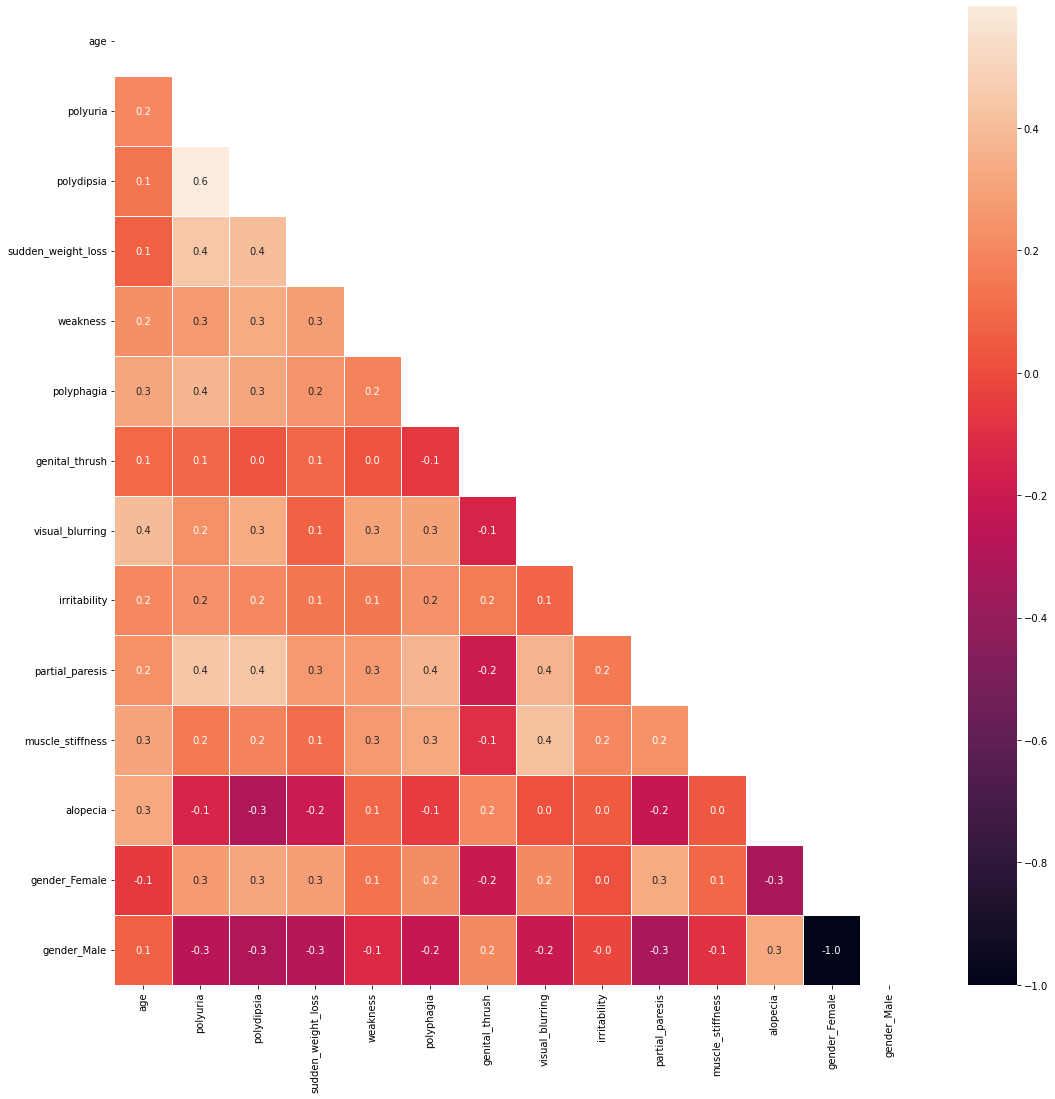

In [5]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
ses.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()


### Train & Test
 The train-test split is a procedure for evaluating the performance of an algorithm.The procedure involves taking a dataset and dividing it into two subsets.The first subset is utilized to fit/train the model.The second subset is used for prediction.The main motive is to estimate the performance of the model on new data.

In [6]:
# Data split for training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)


### Model

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the <code>max_samples</code> parameter if <code>bootstrap=True</code> (default), otherwise the whole dataset is used to build each tree.

#### Model Tuning Parameters

1. n_estimators : The number of trees in the forest.

2. criterion : The function to measure the quality of a split. Supported criteria are 'gini' for the Gini impurity and 'entropy' for the information gain.

3. max_depth : The maximum depth of the tree.

4. max_features : The number of features to consider when looking for the best split:

5. bootstrap : Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

6. oob_score : Whether to use out-of-bag samples to estimate the generalization accuracy.


In [7]:
#Model Parameters
param={'criterion': 'gini', 'n_estimators': 120, 'max_features': 'auto', 'max_depth': 39, 'n_jobs': -1}
# Model Initialization
model=RandomForestClassifier(**param)
model.fit(X_train,Y_train)


RandomForestClassifier(max_depth=39, n_estimators=120, n_jobs=-1)

### Accuracy Metrics
 Performance metrics are a part of every machine learning pipeline. They tell you if you're making progress, and put a number on it. All machine learning models,whether it's linear regression, or a SOTA technique like BERT, need a metric to judge performance.

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.99      1.00      0.99        66

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



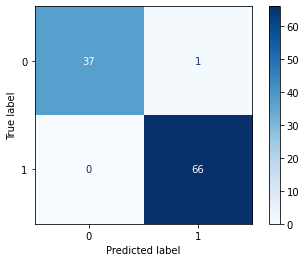

In [8]:
# Confusion Matrix
plot_confusion_matrix(model,X_test,Y_test,cmap=plt.cm.Blues)
# Classification Report
print(classification_report(Y_test,model.predict(X_test)))
